In [1]:
!ls

sample_data


In [4]:
%cd sample_data/

/content/sample_data


In [2]:
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv('cancer.csv',header=None)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   1000025  698 non-null    int64 
 1   5        698 non-null    int64 
 2   1        698 non-null    int64 
 3   1.1      698 non-null    int64 
 4   1.2      698 non-null    int64 
 5   2        698 non-null    int64 
 6   1.3      698 non-null    object
 7   3        698 non-null    int64 
 8   1.4      698 non-null    int64 
 9   1.5      698 non-null    int64 
 10  2.1      698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [13]:
df = df[~df[6].isin(['?'])]                              #eliminate rows that contain ?



In [16]:
df = df.astype(float)
df.iloc[:,10].replace(2, 0,inplace=True)                 #changing from 2 to 0 in column 10
df.iloc[:,10].replace(4, 1,inplace=True)                 #changing from 4 to 1

scaled_df=df
names = df.columns[0:10]
scaler = MinMaxScaler()                                     # applying normalization
scaled_df = scaler.fit_transform(df.iloc[:,0:10])          #when we train the network, we will pick that column from the original df dataframe
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [21]:

X_train=scaled_df.iloc[0:500,1:10].values
y_train=df.iloc[0:500,10:].values

X_test=scaled_df.iloc[501:683,1:10].values
y_test=df.iloc[501:683,10:].values

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
X_train.shape

(500, 9)

In [23]:
y_train.shape

(500, 1)

In [35]:
model = Sequential()


model.add(Dense(units=9,activation='relu'))

model.add(Dense(units=15,activation='relu'))

model.add(Dense(units=7,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [36]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
16/16 [==============================] - 1s 15ms/step - loss: 0.6669 - val_loss: 0.6545
Epoch 2/600
16/16 [==============================] - 0s 5ms/step - loss: 0.6393 - val_loss: 0.6229
Epoch 3/600
16/16 [==============================] - 0s 5ms/step - loss: 0.6093 - val_loss: 0.5842
Epoch 4/600
16/16 [==============================] - 0s 5ms/step - loss: 0.5653 - val_loss: 0.5378
Epoch 5/600
16/16 [==============================] - 0s 5ms/step - loss: 0.5113 - val_loss: 0.4828
Epoch 6/600
16/16 [==============================] - 0s 5ms/step - loss: 0.4604 - val_loss: 0.4201
Epoch 7/600
16/16 [==============================] - 0s 4ms/step - loss: 0.3951 - val_loss: 0.3524
Epoch 8/600
16/16 [==============================] - 0s 5ms/step - loss: 0.3476 - val_loss: 0.2832
Epoch 9/600
16/16 [==============================] - 0s 5ms/step - loss: 0.2766 - val_loss: 0.2217
Epoch 10/600
16/16 [==============================] - 0s 5ms/step - loss: 0.2306 - val_loss: 0.1694
Epoch 11

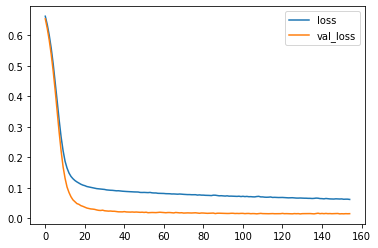

In [37]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [40]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
print(confusion_matrix(y_test,predictions))

[[140   1]
 [  0  41]]
